In [ ]:
import tensorflow as tf
import os

In [ ]:
gpus = tf.config.experimental.list_physical_devices('CPU')

In [ ]:
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

In [ ]:
import cv2
import imghdr
import matplotlib.pyplot as plt

In [ ]:
data_dir = '/content/data'

In [ ]:
os.listdir(os.path.join(data_dir,'happy'))

['1902539.jpg',
 'getty_478389113_970647970450091_99776.jpg',
 'brady-bunch-3.jpg',
 'image9.jpeg',
 'image31.jpeg',
 'image32.png',
 'hqdefault.jpg',
 '227-2271622_happy-people-business-team-celebrating-png.png',
 'images22.jpg',
 'How-to-Be-Happy_1200x628-facebook.jpg',
 'images18.jpg',
 'physed-happiness-facebookJumbo.jpg',
 'images29.jpg',
 'habits-that-define-very-happy-people.jpg',
 'images28.jpg',
 'image11.jpeg',
 'images16.jpg',
 '1902540.jpg',
 'Happy-people-raise-happy-kids-raise-yourself-first.jpg',
 'images11.jpg',
 '05-12-21-happy-people.jpg',
 'image29.jpeg',
 'images35.jpg',
 'images24.jpg',
 'GettyImages-565706549-949x534.jpg',
 'images5.jpg',
 'ADea4I4CgV4-hlxUOAdFjyNYonWRHO6Pu4jWXKk9BJScXws64-c-mo.jpg',
 'images9.jpg',
 'Happy-people-800x533.jpg',
 'image23.jpeg',
 '960x0.jpg',
 'web3-happy-people-outside-smile-sun-nature-eduardo-dutra-620857-unsplash.jpg',
 'o-HAPPY-facebook.jpg',
 'images30.jpg',
 'HappyPeopleBanner.png',
 'image6.jpeg',
 'habits-of-happy-people-cr

In [ ]:
image_exts = ['jpeg','jpg','bmp','png']

In [ ]:
image_exts[2]

'bmp'

In [ ]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    print(image)

image9.jpeg
image32.png
iStock_000001932580XSmall.jpg
artworks-pQBql6xWFe6JFOp4-FRtE5g-t500x500.jpg
sadness.jpg
images22.jpg
sad-people-vector-2153909.jpg
Make-someone-sad-happy.jpg
images18.jpg
image31.png
images29.jpg
1000_F_58495935_Nr9VzQljLyN3RKKhGDGxQDBEkqIeLzrZ.jpg
images28.jpg
image11.jpeg
images16.jpg
AdobeStock_221688877-copy.jpg
pablo-varela-311608.jpg
images11.jpg
images48.jpg
isolated-girl-crying-over-makeup-sad-person-concept-isolated-white-174239618.jpg
sad-looking-man.jpg
image29.jpeg
sadness-inside-out-today-main-tease-191018.jpg
images35.jpg
sad-human-figure-depression-concept-drawing-frank-ramspott.jpg
images24.jpg
images5.jpg
ADea4I4CgV4-hlxUOAdFjyNYonWRHO6Pu4jWXKk9BJScXws64-c-mo.jpg
images9.jpg
images44.jpg
image23.jpeg
image30.png
images30.jpg
image6.jpeg
image12.jpeg
images8.jpg
51079685_M.jpg
boy-with-head-down.jpg
Crying-girl.jpg
Depression-More-Than-Being-Sad.jpg
SAD.jpg
52672678._SX318_SY475_.jpg
images7.jpg
image14.jpeg
405-4050267_sad-people-png-sad-person-

In [ ]:
img = cv2.imread(os.path.join('data','happy','_happy_jumping_on_beach-40815.jpg'))

In [ ]:
img.shape

(213, 320, 3)

In [ ]:
type(img)

numpy.ndarray

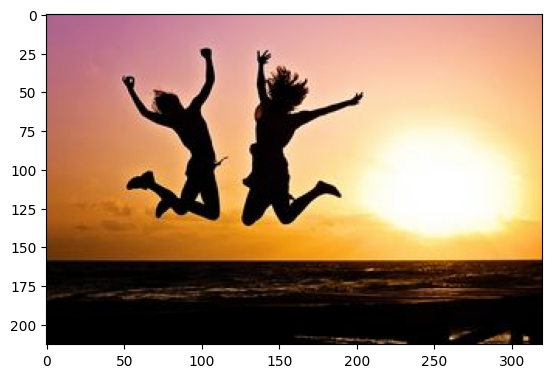

In [ ]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path = os.path.join(data_dir,image_class,image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not in ext list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image {}'.format(image_path))

Issue with image /content/data/sad/.ipynb_checkpoints
Issue with image /content/data/happy/.ipynb_checkpoints


In [ ]:
import numpy as np

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [ ]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
data_iterator

In [ ]:
#Get another batch as iterator
batch = data_iterator.next()

In [ ]:
#Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [ ]:
#Class 1 = Sad ppl
#Class 0 = happy ppl
batch[1]

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1], dtype=int32)

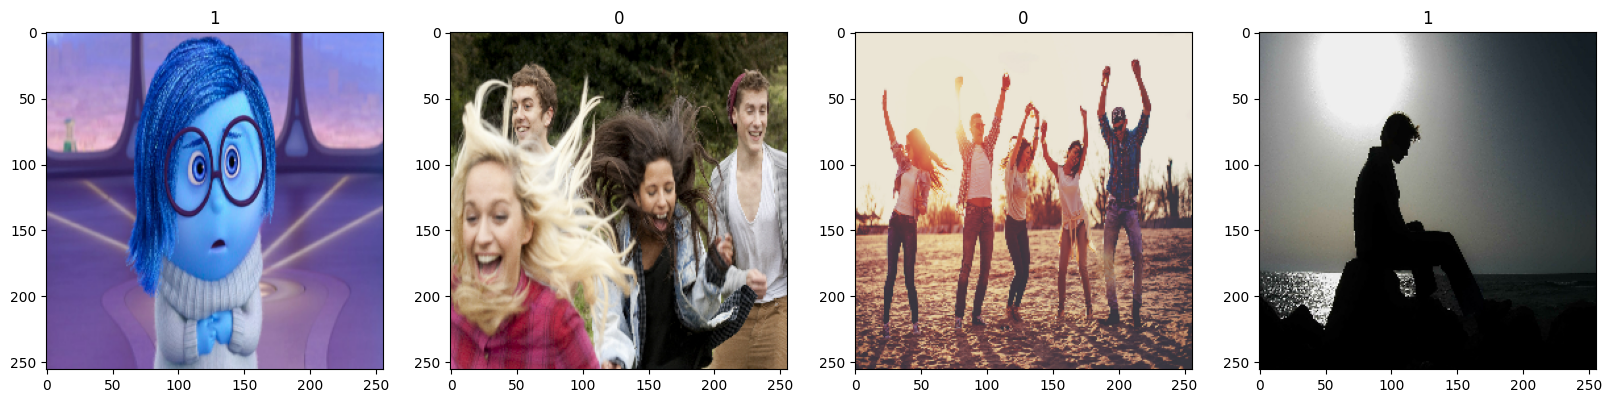

In [ ]:
fig,ax = plt.subplots(ncols = 4,figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
batch[0].max()

255.0

In [ ]:
sacled = batch[0]/255

In [ ]:
sacled.max()

1.0

# 2.Preprocess Data
2.1 Scale Data

In [ ]:
data = data.map(lambda x, y: (x/255,y))

In [ ]:
scaled_iterator = data.as_numpy_iterator()

In [ ]:
batch = scaled_iterator.next()

In [ ]:
batch[0].min()

0.0

In [ ]:
batch[0].max()

1.0

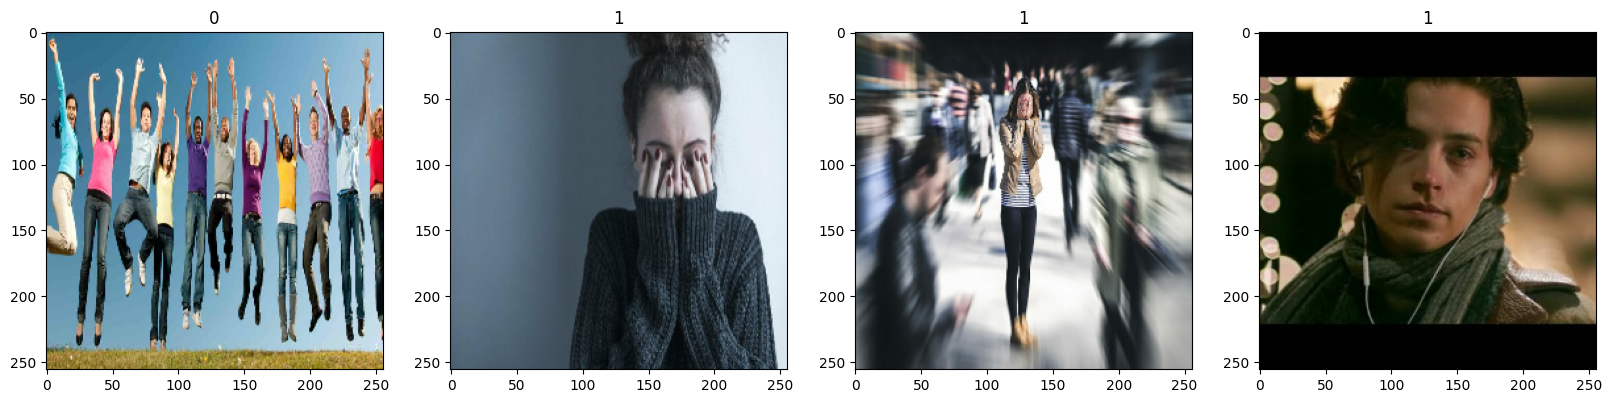

In [ ]:
fig,ax = plt.subplots(ncols = 4,figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

2.2 Split Data

In [ ]:
len(data)

10

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2) + 1
test_size = int(len(data)*.1) + 1

In [ ]:
train_size + val_size + test_size

12

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
len(train)

7

In [ ]:
len(test)

0

In [ ]:
len(val)

3

# 3.Deep Model
3.1 Build Deep Learning Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [ ]:
model = Sequential ()

In [ ]:
model.add(Conv2D(16,(3,3),1,activation = 'relu',input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(48,(3,3),1,activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [ ]:
model.compile('adam',loss = tf.losses.BinaryCrossentropy(),metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_27 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 60, 60, 48)        13872     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 30, 30, 48)       

3.2 Train

In [ ]:
logdir = 'logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [ ]:
hist = model.fit(train, epochs = 20, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 24s 3s/step - loss: 2.2073 - accuracy: 0.5089 - val_loss: 0.9401 - val_accuracy: 0.4691
Epoch 2/20
7/7 [==============================] - 20s 3s/step - loss: 0.7304 - accuracy: 0.5938 - val_loss: 0.7245 - val_accuracy: 0.5679
Epoch 3/20
7/7 [==============================] - 20s 2s/step - loss: 0.6273 - accuracy: 0.6429 - val_loss: 0.5232 - val_accuracy: 0.7778
Epoch 4/20
7/7 [==============================] - 20s 3s/step - loss: 0.4804 - accuracy: 0.8125 - val_loss: 0.4051 - val_accuracy: 0.8148
Epoch 5/20
7/7 [==============================] - 21s 2s/step - loss: 0.4465 - accuracy: 0.7768 - val_loss: 0.3729 - val_accuracy: 0.8642
Epoch 6/20
7/7 [==============================] - 20s 3s/step - loss: 0.3683 - accuracy: 0.8482 - val_loss: 0.3015 - val_accuracy: 0.8889
Epoch 7/20
7/7 [==============================] - 26s 3s/step - loss: 0.3105 - accuracy: 0.9018 - val_loss: 0.2261 - val_accuracy: 0.9383
Epoch 8/20
7/7 [==================

3.3 Plot Performance

In [ ]:
hist.history

{'loss': [2.2073311805725098,
  0.7304413914680481,
  0.6272967457771301,
  0.48035624623298645,
  0.44652459025382996,
  0.3683406710624695,
  0.3105107843875885,
  0.23684810101985931,
  0.13954181969165802,
  0.10307472944259644,
  0.07076026499271393,
  0.09190399944782257,
  0.08347389847040176,
  0.05279943719506264,
  0.05494029447436333,
  0.02997971698641777,
  0.02642729878425598,
  0.015659188851714134,
  0.007170786149799824,
  0.01329115591943264],
 'accuracy': [0.5089285969734192,
  0.59375,
  0.6428571343421936,
  0.8125,
  0.7767857313156128,
  0.8482142686843872,
  0.9017857313156128,
  0.9151785969734192,
  0.9598214030265808,
  0.9553571343421936,
  0.9866071343421936,
  0.9776785969734192,
  0.9821428656578064,
  0.9910714030265808,
  0.9821428656578064,
  0.9910714030265808,
  0.9955357313156128,
  0.9955357313156128,
  1.0,
  0.9955357313156128],
 'val_loss': [0.940051794052124,
  0.7245410084724426,
  0.5231709480285645,
  0.4050852358341217,
  0.3728613257408142

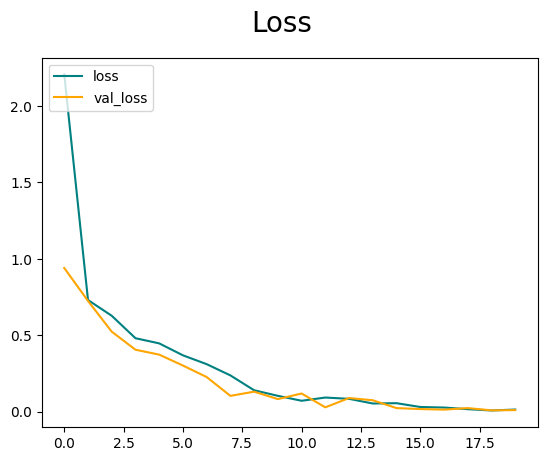

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'],color = 'teal',label = 'loss')
plt.plot(hist.history['val_loss'],color = 'orange',label = 'val_loss')
fig,plt.suptitle('Loss',fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

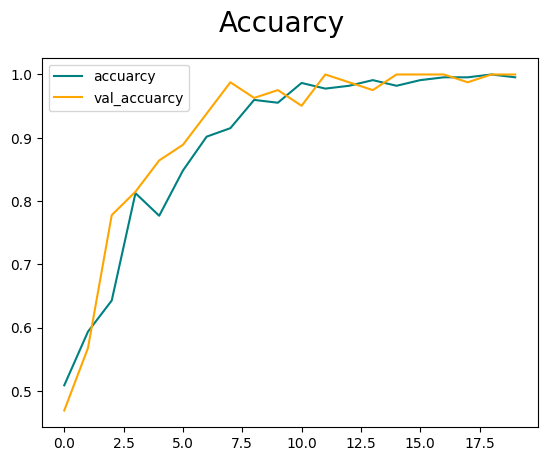

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color = 'teal',label = 'accuarcy')
plt.plot(hist.history['val_accuracy'],color = 'orange',label = 'val_accuarcy')
fig,plt.suptitle('Accuarcy',fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

# 4. Evaluate Performance

4.1 Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
len(test)

0

In [ ]:
for batch in test.as_numpy_iterator():
  X,y = batch
  yhat = model.predict(X)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)

In [ ]:
print(f'Precision:{pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{acc.result().numpy}')

Precision:0.0,Recall:0.0,Accuracy:<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=float32, numpy=0.0>>


4.2 Test

In [ ]:
import cv2

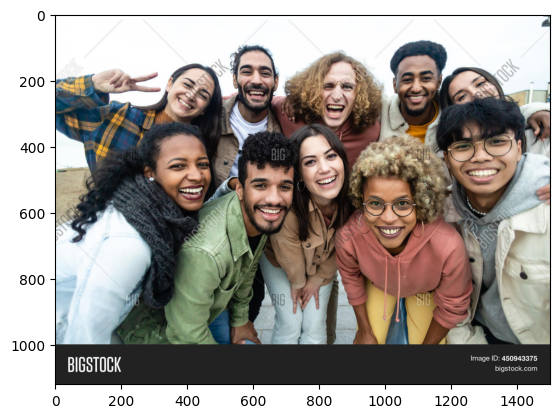

In [ ]:
img = cv2.imread('happytest.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

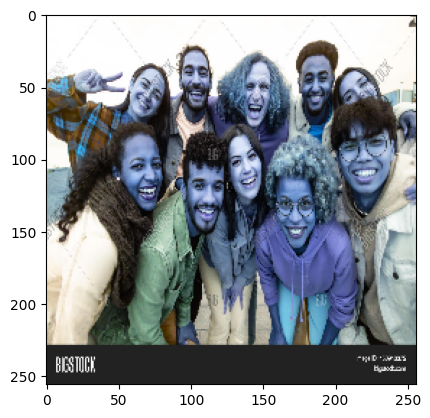

In [ ]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
np.expand_dims(resize,0)

array([[[[254.      , 254.      , 254.      ],
         [254.      , 254.      , 254.      ],
         [254.      , 254.      , 254.      ],
         ...,
         [250.625   , 248.3125  , 241.25    ],
         [253.24316 , 249.46436 , 240.57812 ],
         [254.07959 , 250.07959 , 240.95459 ]],

        [[254.      , 254.      , 254.      ],
         [254.      , 254.      , 254.      ],
         [254.      , 254.      , 254.      ],
         ...,
         [159.52344 , 139.27344 , 121.27344 ],
         [124.82373 , 112.06641 ,  92.88379 ],
         [136.4956  , 124.245605, 114.433105]],

        [[254.      , 254.      , 254.      ],
         [254.      , 254.      , 254.      ],
         [254.      , 254.      , 254.      ],
         ...,
         [252.37256 , 249.93506 , 242.12256 ],
         [229.6626  , 220.4253  , 211.65771 ],
         [227.44775 , 226.06494 , 205.76807 ]],

        ...,

        [[ 34.      ,  34.      ,  34.      ],
         [ 34.      ,  34.      ,  34.      ]

In [ ]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 208ms/step


In [ ]:
resize.shape

TensorShape([256, 256, 3])

In [ ]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [ ]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 79ms/step


In [ ]:
yhat

array([[0.8209989]], dtype=float32)

In [ ]:
if yhat > 0.5:
  print(f'Predicted class Sad')
else:
  print(f'Prdicted class is to HAppy')

Predicted class Sad


# 5. Save the Model
5.1 Save the model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','happysadmodel.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
new_model = load_model(os.path.join('models','happysadmodel.h5'))

In [ ]:
yhatnew = new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 38ms/step


In [ ]:
if yhat > 0.5:
  print(f'Predicted class is Sad')
else:
  print(f'Predicted class is Happy')

Predicted class is Sad
